In [1]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np

In [2]:
data_dir = '../data/P00000001-ALL.csv'

In [3]:
dateparse = lambda x: pd.datetime.strptime(x, '%d-%b-%y')
contributions = pd.read_csv(data_dir, index_col=False, parse_dates=['contb_receipt_dt'], date_parser=dateparse)

/home/joe/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (6,11,12,13,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
repubs = contributions[contributions['cand_nm'] == 'Trump, Donald J.']
dems = contributions[contributions['cand_nm'] != 'Trump, Donald J.']

In [5]:
print(f'Columns provided in data set: {",  ".join(contributions.columns)}')
print(f'\nNumber of contributions in dataset : {len(contributions)}')

Columns provided in data set: cmte_id,  cand_id,  cand_nm,  contbr_nm,  contbr_city,  contbr_st,  contbr_zip,  contbr_employer,  contbr_occupation,  contb_receipt_amt,  contb_receipt_dt,  receipt_desc,  memo_cd,  memo_text,  form_tp,  file_num,  tran_id,  election_tp

Number of contributions in dataset : 1322383


In [6]:
contributions.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp
0,C00508416,P00006213,"Delaney, John K.","JACKLIN, CHARLES",HUNTSVILLE,AL,358061203,NOT EMPLOYED,NOT EMPLOYED,500.0,2019-06-28,NaN,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,SA17A,1340229,606419,P2020
1,C00508416,P00006213,"Delaney, John K.","STACEY, WILLIAM",FPO,AP,965340032,COAST GUARD,MARINE INSPECTOR,500.0,2018-06-04,NaN,NaN,NaN,SA17A,1260664,VTQXVDP3ZW1,P2020
2,C00508416,P00006213,"Delaney, John K.","DIRUSSO, ANTHONY",TUCSON,AZ,857428814,SELF - TONY DIRUSSO,VIDEOGRAPHER,10.0,2019-05-12,NaN,NaN,NaN,SA17A,1340229,602047,P2020
3,C00508416,P00006213,"Delaney, John K.","DIRUSSO, ANTHONY",TUCSON,AZ,857428814,SELF - TONY DIRUSSO,VIDEOGRAPHER,10.0,2019-06-12,NaN,NaN,NaN,SA17A,1340229,603713,P2020
4,C00508416,P00006213,"Delaney, John K.","SPIEGEL, RICHARD",PHOENIX,AZ,850184553,FAMILY MENTAL HEALTH ASSOCIATES LTD,PHYSICIAN,50.0,2019-03-05,NaN,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,SA17A,1324749,596607,P2020


# Contributions By Candidate

Text(0.5, 1.0, 'Contributions by Candidate')

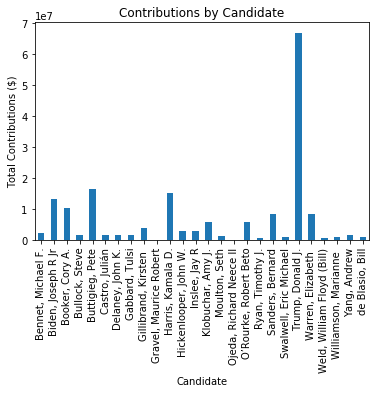

In [7]:
contributions.groupby('cand_nm')['contb_receipt_amt'].sum().plot.bar()
plt.xlabel("Candidate")
plt.ylabel("Total Contributions ($)")
plt.title("Contributions by Candidate")

In [8]:
contributions_by_individual = contributions.groupby('contbr_nm')['contb_receipt_amt'].sum().sort_values()
contributions_by_individual.tail()

contbr_nm
WOMENCOUNT PAC                                            107460.00
TULSI FOR HAWAI'I                                         132078.00
CORY BOOKER FOR SENATE - UNITEMIZED                       901432.04
KAMALA HARRIS FOR SENATE - UNITEMIZED                    1016308.67
TRUMP MAKE AMERICA GREAT AGAIN COMMITTEE - UNITEMIZED    6713527.71
Name: contb_receipt_amt, dtype: float64

# Plot of Contributions by State

Text(0.5, 1.0, 'Total Contributions by State')

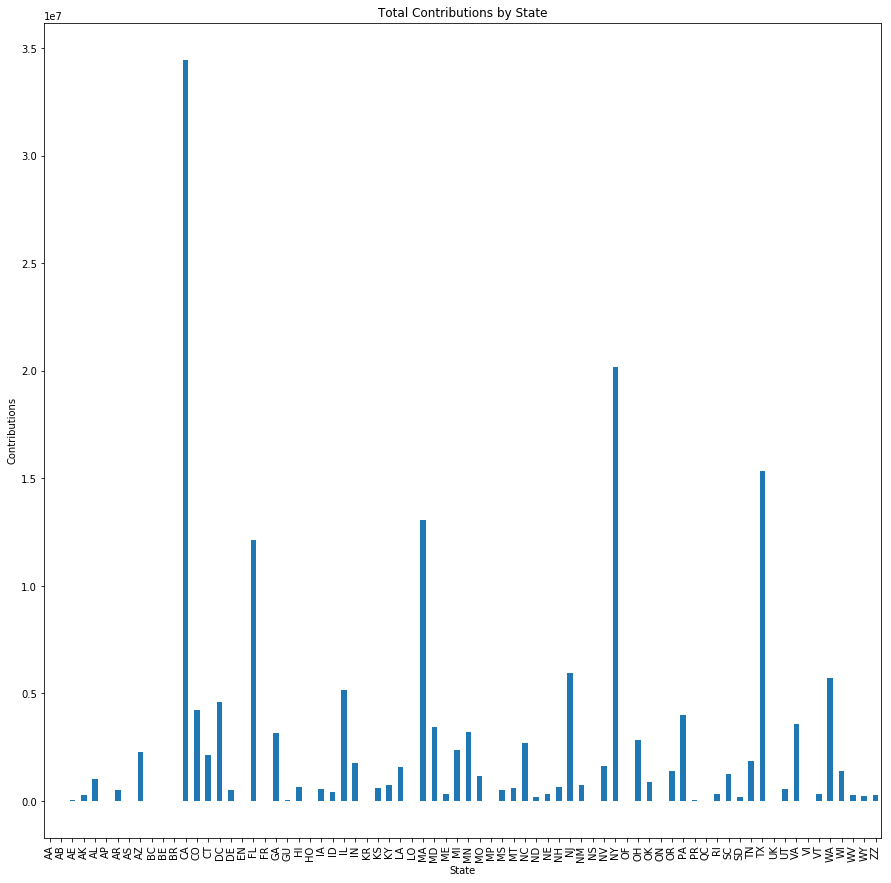

In [ ]:
plt.figure(figsize=(15,15))
contributions.groupby('contbr_st')['contb_receipt_amt'].sum().plot.bar()
plt.xlabel('State')
plt.ylabel('Contributions')
plt.title('Total Contributions by State')

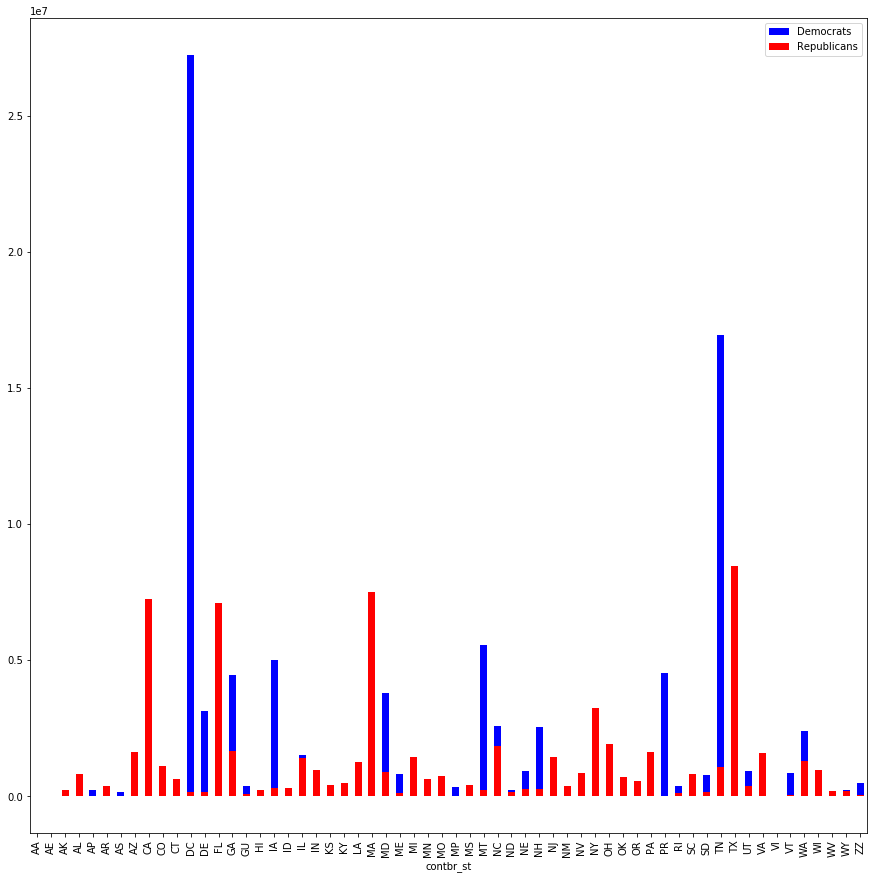

In [ ]:
plt.figure(figsize=(15,15))
dems.groupby('contbr_st')['contb_receipt_amt'].sum().plot.bar(label='Democrats', color='b')
repubs.groupby('contbr_st')['contb_receipt_amt'].sum().plot.bar(label='Republicans', color='r')
plt.legend()

# Above plot hides data, here is its opposite

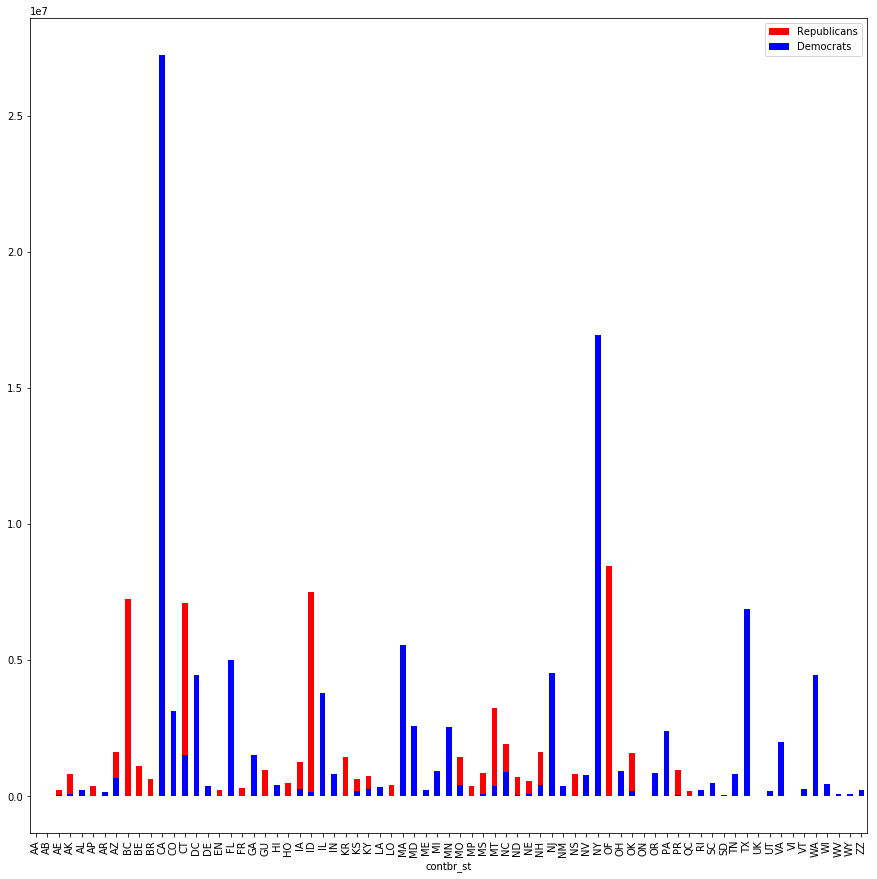

In [ ]:
plt.figure(figsize=(15,15))
repubs.groupby('contbr_st')['contb_receipt_amt'].sum().plot.bar(label='Republicans', color='r')
dems.groupby('contbr_st')['contb_receipt_amt'].sum().plot.bar(label='Democrats', color='b')
plt.legend()

# Why is it so hard to have the bars be side by side and not overlapped :(

<Figure size 1080x1080 with 0 Axes>

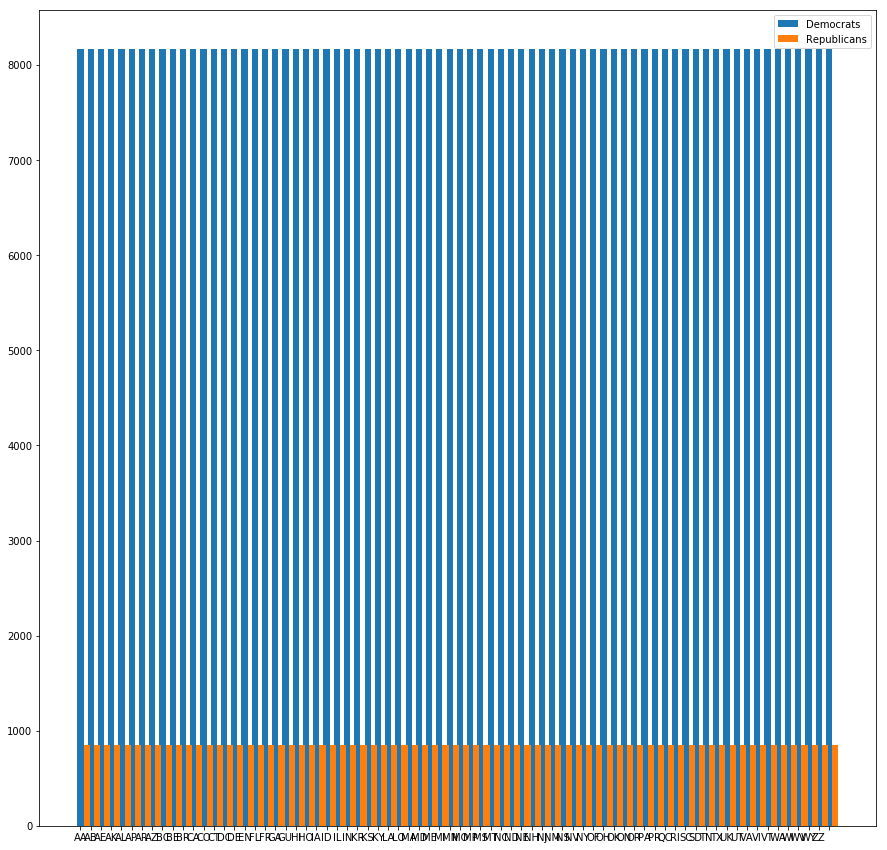

In [ ]:
plt.figure(figsize=(15,15))
n_states = len(contributions['contbr_st'].unique())
ind = np.arange(n_states)/4 + .15
width = .15
#dems.groupby('contbr_st')['contb_receipt_amt'].sum().plot.bar(x=ind, width=width, label='Democrats', color='b')
#repubs.groupby('contbr_st')['contb_receipt_amt'].sum().plot.bar(x=ind+width, width=width, label='Republicans', color='r')
t1 = dems.groupby('contbr_st')['contb_receipt_amt'].sum()
t2 = repubs.groupby('contbr_st')['contb_receipt_amt'].sum()
fig, ax = plt.subplots(figsize=(15,15))
ax.bar(ind, t1.values[0], width, label='Democrats')
ax.bar(ind+width, t2.values[0], width, label='Republicans')
ax.set_xticks(ind)
ax.set_xticklabels(t1.index)
plt.legend()

# Plotting contributions to a candidate over time
## List of Candidates

In [ ]:
print(contributions['cand_nm'].unique())

['Delaney, John K.' 'Trump, Donald J.' 'Yang, Andrew'
 'Ojeda, Richard Neece II' 'Castro, Julián' 'Warren, Elizabeth '
 'Gabbard, Tulsi' 'Gillibrand, Kirsten ' 'Harris, Kamala D.'
 'Booker, Cory A.' 'Williamson, Marianne ' 'Klobuchar, Amy J.'
 'Sanders, Bernard' 'Buttigieg, Pete' 'Inslee, Jay R'
 'Hickenlooper, John W.' 'O’Rourke, Robert Beto' 'Gravel, Maurice Robert'
 'Weld, William Floyd (Bill)' 'Swalwell, Eric Michael' 'Ryan, Timothy J.'
 'Biden, Joseph R Jr' 'Moulton, Seth' 'Bennet, Michael F.'
 'Bullock, Steve' 'de Blasio, Bill']


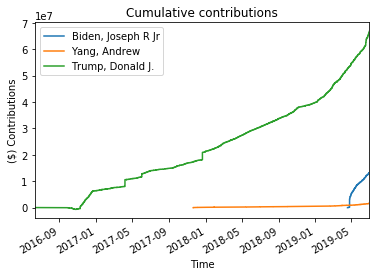

In [ ]:
def plot_contributions_over_time(candidates):
    for candidate in candidates:
        df = contributions[contributions['cand_nm'] == candidate].sort_values(by='contb_receipt_dt')
        df.index = df['contb_receipt_dt']
        df['contb_receipt_amt'].cumsum().plot(label=candidate)
    plt.ylabel('($) Contributions')
    plt.xlabel('Time')
    plt.title(f'Cumulative contributions')
    plt.legend()
plot_contributions_over_time(['Biden, Joseph R Jr', 'Yang, Andrew', 'Trump, Donald J.'])

## Contributors to Multiple Campaigns

In [ ]:
contributors_to_multiple_campaigns = contributions.groupby('contbr_nm').filter(lambda x : len(x['cand_nm'].unique()) > 1)

In [ ]:
contributors_to_multiple_campaigns.groupby(['contbr_nm', 'cand_nm']).sum()['contb_receipt_amt']

contbr_nm           cand_nm              
280 KOP REALTY LLC  Biden, Joseph R Jr       2800.00
                    Bullock, Steve           2800.00
AAKER, DAVID        Buttigieg, Pete           250.00
                    Klobuchar, Amy J.         500.00
AANGEENBRUG, LISE   Bennet, Michael F.        250.00
                    Hickenlooper, John W.     500.00
AARON, PATRICE      Harris, Kamala D.         250.00
                    Warren, Elizabeth         250.00
AARONS, MORRA       Gillibrand, Kirsten       500.00
                    Warren, Elizabeth         250.00
AARONSON, DAVID     Inslee, Jay R             500.00
                    Warren, Elizabeth        1000.00
AARONSON, LEE       Gillibrand, Kirsten       500.00
                    Klobuchar, Amy J.        2830.00
AARONSON, PAULA     Gillibrand, Kirsten      2800.00
                    Klobuchar, Amy J.        5600.00
AAZAMI, SHERVIN     Harris, Kamala D.         750.00
                    Warren, Elizabeth         675.00
ABBE

In [ ]:
print(f'Number of people contributing to multiple candidates: {len(contributors_to_multiple_campaigns["contbr_nm"].unique())}')

Number of people contributing to multiple candidates: 17157


## Graph Construction
Options:
1. Undirected graph, unweighted (for now)
   - Draw an edge between contributors if they contributed to the same candidate

2. Directed multigraph, weighted
   - draw an edge from contributor to candidate with weight being amount of contributions
   
Need to be smart potentially about graph csonstruction, considering high number of edges with option(1)
Below code will crash kernel

In [ ]:
#import itertools
#edge_list = []
#contributions.groupby('cand_nm').apply(lambda x: edge_list.extend(itertools.combinations(x['contbr_nm'], #2)))